<a href="https://colab.research.google.com/github/dataSci-rigo/w207-projects/blob/master/w207_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

np.random.seed(0)

In [23]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#drive=GoogleDrive(4/iQEapMjjZP0ngyzZdGQsb1VhT8Hy3GEhw3R3CHr4yo4GFPHi08aFUUk)


     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
test_csv_link = 'https://drive.google.com/open?id=1HB3mJo_2EVewP9oqHtlcDCfw6y01om63' # shareable link
train_csv_link = 'https://drive.google.com/open?id=1DiE4w94eJDEXxn87npDd5o6Y3QFdzzIU' # shareable link

_, test_id = test_csv_link.split('=')
_, train_id = train_csv_link.split('=')
# print (test_id) # Verify that you have everything after '='
# print (train_id) # Verify that you have everything after '='

downloaded_test = drive.CreateFile({'id':test_id})
downloaded_train = drive.CreateFile({'id':train_id}) 
downloaded_test.GetContentFile('test.csv')
downloaded_train.GetContentFile('train.csv')


In [0]:
#from google.colab import files
#files.upload()

# **EDA**

In [25]:

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("train shape: {}".format(train_df.shape))
print("test shape: {}".format(test_df.shape))

# Convert Image from string to np array of floats between 0 and 1
train_df.Image = train_df.Image.apply(lambda x: np.array(object=x.split(' '), 
                                                         dtype=float)) / 255
test_df.Image = test_df.Image.apply(lambda x: np.array(object=x.split(' '), 
                                                       dtype=float)) / 255

train shape: (7049, 31)
test shape: (1783, 2)


In [0]:
train_df.head().T

In [0]:
test_df.head()

## **Check for Missing Data**


In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [0]:
### pull out examples of missing data
# left_eye_center_x

train_df[train_df['left_eye_center_x'].isnull() == True]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
1687,NaN,NaN,NaN,NaN,57.931068,40.808627,73.232712,44.910035,NaN,NaN,19.393354,30.279554,59.362578,35.177498,76.553349,40.842495,38.311092,28.608206,19.365442,23.906166,42.174021,55.500993,54.595918,74.511943,24.118659,68.652754,39.136317,71.487238,37.405514,75.520178,"[0.20784313725490197, 0.21568627450980393, 0.2..."
1834,NaN,NaN,NaN,NaN,41.122383,43.111925,49.822688,39.401949,28.818827,47.168082,NaN,NaN,31.916349,35.952397,50.125814,29.714780,25.437982,40.986264,17.361909,42.430765,27.017399,63.240190,54.380973,63.966847,31.776519,74.325852,37.135567,70.228468,41.736649,76.507387,"[0.26666666666666666, 0.26666666666666666, 0.2..."
1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.020743,32.837738,74.912546,43.573637,45.832051,28.651723,19.829508,30.793978,51.427229,53.877310,57.458039,80.878314,32.511208,76.078956,45.435075,76.046196,44.288471,79.993791,"[0.09803921568627451, 0.09019607843137255, 0.0..."
1938,NaN,NaN,NaN,NaN,59.603142,41.750697,75.085986,49.088207,38.232536,33.229570,24.102628,29.247888,57.789811,34.389546,81.221553,41.262194,40.284481,29.782881,20.665065,18.502775,34.447805,62.884158,49.917692,82.619275,21.997412,69.704035,35.746465,78.990190,34.873289,81.526558,"[0.16470588235294117, 0.1607843137254902, 0.17..."
2100,NaN,NaN,46.180446,38.001579,67.601641,41.736941,77.647986,42.364153,50.589530,38.493913,40.457143,37.580337,NaN,NaN,NaN,NaN,58.093771,34.185342,36.910169,30.827471,64.842080,60.458789,66.114101,75.403698,39.672788,73.862758,55.859308,71.557480,52.268891,84.015333,"[0.13725490196078433, 0.06274509803921569, 0.1..."
2137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.476893,29.793548,42.880843,29.448058,29.147597,27.223963,43.623302,51.613917,54.875576,67.435945,37.504147,60.976959,44.479263,60.917972,45.482028,68.394470,"[0.06666666666666667, 0.06666666666666667, 0.0..."
2153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.539810,53.724863,63.036965,68.311584,37.544582,70.934866,52.036102,69.475137,52.268813,70.702156,"[0.17647058823529413, 0.2, 0.25098039215686274..."
2175,NaN,NaN,66.786621,39.081633,NaN,NaN,NaN,NaN,70.714966,38.542177,61.428580,39.055628,79.787831,34.689191,84.716629,32.914134,76.582388,32.175964,58.418216,31.673318,88.850000,50.219898,NaN,NaN,74.017993,68.806327,83.989082,66.173401,84.979218,67.902653,"[0.0, 0.0, 0.00392156862745098, 0.0, 0.0, 0.00..."
2186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.557864,27.709876,NaN,NaN,37.708376,57.979672,73.062903,68.390158,NaN,NaN,49.711997,71.270341,50.830746,77.197330,"[0.6980392156862745, 0.6901960784313725, 0.682..."
2239,NaN,NaN,31.925567,35.312088,57.229069,39.959582,NaN,NaN,38.241712,38.002787,24.544151,35.164360,NaN,NaN,NaN,NaN,39.611050,30.456446,20.641613,26.187656,48.210313,55.102877,58.146540,71.447188,32.288900,69.744848,46.050971,72.038527,46.033051,73.830463,"[0.0196078431372549, 0.027450980392156862, 0.0..."


## **Forward Fill Missing Data**

Since the data has multiple columns of missing information we are going to input them using the forward fill method.

In [0]:
train_df.fillna(method = 'ffill', inplace = True)
test_df.fillna(method = 'ffill', inplace = True)

# **Split train into train/dev sets**

In [0]:
from sklearn.model_selection import train_test_split
#Splitting the data into a 75/25 training and dev split
#Using random state 0 for reproducibility
train, dev = train_test_split(train_df, test_size=0.25, random_state = 0)

# **Print a few images to validate the data**


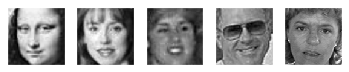

In [31]:
train_images=np.concatenate(np.array(train.Image.values)).ravel().reshape(5286,9216)
dev_images_raw=np.concatenate(dev['Image'].values).ravel().reshape(dev.Image.values.shape[0],9216)

def plot_example(num_examples,train):
  
  for i in range(num_examples):
    ax = plt.subplot(1,num_examples,i+1)
    ax.imshow(train[i].reshape(96,96),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plot_example(5,train_images)

In [0]:
def plot_example(num_examples):
  
  for i in range(num_examples):
    ax = plt.subplot(1,num_examples,i+1)
    ax.imshow(train.Image.iloc[i].reshape(96,96),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plot_example(5)

In [0]:
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
#from sklearn.grid_search import GridSearchCV
#from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics

In [0]:
train_left_eye_x=np.array(train['left_eye_center_x'].values)
dev_left_eye_x=dev['left_eye_center_x'].values

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(np.round(train_left_eye_x,3))
dev_encoded = lab_enc.fit_transform(np.round(dev_left_eye_x,3))

# **Model for Left Eye Center X**
##Linear Regression


In [0]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
lr_fit = linear_reg.fit(train_images, encoded)
lr_pred = lr_fit.predict(dev_images_raw)


In [0]:
lr_pred.score

AttributeError: ignored

##K-Nearest Neighbors

In [0]:
train_images = train.Image
dev_images = dev.Image
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(train_images, encoded)
dev_pred = knn5.predict(dev_images)


ValueError: ignored

In [0]:
train_images

In [0]:
#dev_pred.shape
train_pred = knn5.predict(train_images)

In [0]:
metrics.confusion_matrix(encoded, train_pred)
metrics.classification_report(dev_encoded, dev_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       1.0\n           1       0.00      0.00      0.00       1.0\n           2       0.00      0.00      0.00       1.0\n           3       0.00      0.00      0.00       1.0\n           4       0.00      0.00      0.00       1.0\n           5       0.00      0.00      0.00       1.0\n           6       0.00      0.00      0.00       1.0\n           7       0.00      0.00      0.00       1.0\n           8       0.00      0.00      0.00       1.0\n           9       0.00      0.00      0.00       1.0\n          10       0.00      0.00      0.00       1.0\n          11       0.00      0.00      0.00       1.0\n          12       0.00      0.00      0.00       1.0\n          13       0.00      0.00      0.00       1.0\n          14       0.00      0.00      0.00       1.0\n          15       0.00      0.00      0.00       1.0\n          16       0.00      0.00      0.00       1.0\n       


## SVM


In [0]:
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
#from sklearn.datasets import fetch_lfw_people
#faces = fetch_lfw_people(min_faces_per_person=60)
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(450)
pca.fit(dev_images_raw)
dev_components = pca.transform(dev_images_raw)
train_components = RandomizedPCA(450).fit(train_images).transform(train_images)
lab_enc = preprocessing.OrdinalEncoder()
encoded = lab_enc.fit_transform(np.round(train_left_eye_x,0).reshape(-1, 1) )
lab_enc = preprocessing.OrdinalEncoder(categories=lab_enc.categories_)
dev_encoded = lab_enc.fit_transform(np.round(dev_left_eye_x,0).reshape(-1, 1) )

In [34]:
from sklearn import linear_model 
sgd=linear_model.SGDRegressor(penalty='l1')
sgd_model=sgd.fit(train_components, train_left_eye_x)
sgd_pred=sgd_model.predict(dev_components)
print("The coefficient of determination R^2 of the prediction. ", sgd_model.score(dev_components,dev_left_eye_x))

The coefficient of determination R^2 of the prediction.  -0.495389373694267


In [0]:
'''''class sklearn.linear_model.SGDRegressor(loss=’squared_loss’, penalty=’l2’, 
                                        alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                                        max_iter=1000, tol=0.001, shuffle=True, verbose=0,
                                        epsilon=0.1, random_state=None, learning_rate=’invscaling’, 
                                        eta0=0.01, power_t=0.25, early_stopping=False, 
                                        validation_fraction=0.1, n_iter_no_change=5, warm_start=False,
                                        average=False)
'''
from sklearn import linear_model 
sgd=linear_model.SGDRegressor(penalty='l1')
sgd_model=sgd.fit(train_images_raw, train_left_eye_x)
sgd_pred=reg.predict(train_images)
print("The coefficient of determination R^2 of the prediction. ", sgd_model.score(dev_images_raw, dev_left_eye_x))

In [35]:
from sklearn import svm
'''class sklearn.svm.SVR(kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0,
                      tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, 
                      verbose=False, max_iter=-1)
                      '''
'''"Epsilon-Support Vector Regression.

The free parameters in the model are C and epsilon.
The implementation is based on libsvm. The fit time complexity is more than quadratic
with the number of samples which makes it hard to scale to datasets with more than a 
couple of 10000 samples. For large datasets consider using sklearn.linear_model.LinearSVR 
or sklearn.linear_model.SGDRegressor instead, possibly after a 
sklearn.kernel_approximation.Nystroem transformer.
"
svr'''
svr=svm.SVR(kernel='rbf',tol=0.01,C=64)
svr_model=svr.fit(train_images, train_left_eye_x)
svr_pred=svr_model.predict(dev_images_raw)
print("The coefficient of determination R^2 of the prediction. ", svr_model.score(dev_images_raw,dev_left_eye_x))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The coefficient of determination R^2 of the prediction.  0.27543128070347334


In [36]:
'''C= {'C': [ 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32, 64, 128, 256]}
gridSearch = GridSearchCV(svr, param_grid=C, cv=3, iid=True)
gridSearchfit=gridSearch.fit(train_components, train_left_eye_x)
print("Naive bayes best score and best param",gridSearchfit.best_score_,gridSearchfit.best_params_) '''
print("Did not run again previous restults were: ")
print("Naive bayes best score and best param 0.32848829763984433 {'C': 64}")

Did not run again previous restults were: 
Naive bayes best score and best param 0.32848829763984433 {'C': 64}


In [37]:
svr=svm.SVR(kernel='rbf',C=64)
svr_model=svr.fit(train_components, train_left_eye_x)
svr_pred=svr_model.predict(dev_components)
print("The coefficient of determination R^2 of the prediction. ", svr_model.score(dev_components,dev_left_eye_x))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The coefficient of determination R^2 of the prediction.  -0.37660852536067635


## Ridge

SyntaxError: ignored

In [40]:
dev_eyes=dev[['left_eye_center_y','left_eye_center_x','right_eye_center_y','right_eye_center_x']].values
train_eyes=train[['left_eye_center_y','left_eye_center_x','right_eye_center_y','right_eye_center_x']].values

ridge=linear_model.Ridge()
ridge_model=ridge.fit(train_components, train_eyes)
ridge_pred=ridge_model.predict(dev_components)
print("The coefficient of determination R^2 of the prediction. ", ridge_model.score(dev_components,dev_eyes))

The coefficient of determination R^2 of the prediction.  -0.564690667274357


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [41]:
pca = RandomizedPCA(1000)
pca.fit(dev_images_raw)
dev_components = pca.transform(dev_images_raw)
train_components = RandomizedPCA(1000).fit(train_images).transform(train_images)


dev_left_eye=dev[['left_eye_center_y','left_eye_center_x']].values
train_left_eye=train[['left_eye_center_y','left_eye_center_x']].values
print(dev_left_eye.shape)
ridge=linear_model.Ridge()
ridge_model=ridge.fit(train_components, train_left_eye)
ridge_pred=ridge_model.predict(dev_components)
print("The coefficient of determination R^2 of the prediction. ", ridge_model.score(dev_components,dev_left_eye))

(1763, 2)
The coefficient of determination R^2 of the prediction.  -0.6645298545382882


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


## Neural Net


In [42]:
import keras
import cv2
from PIL import Image
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget -N https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_eye.xml
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

Using TensorFlow backend.


--2019-07-26 22:07:31--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.07s   

Last-modified header missing -- time-stamps turned off.
2019-07-26 22:07:31 (11.9 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2019-07-26 22:07:32--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_eye.xml
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Locat

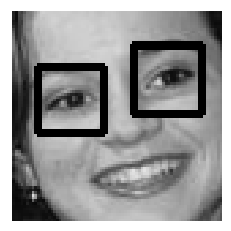

In [43]:
formatted = (np.float32(train_images[10].reshape(96,96)) * 255).astype('uint8')
img = Image.fromarray(formatted)
bounding_boxes = face_cascade.detectMultiScale(formatted, 1.25, 6)
for (x,y,w,h) in bounding_boxes:
  cv2.rectangle(formatted,(x,y),(x+w,y+h),(255,0,0),2)
  roi_gray = formatted[y:y+h, x:x+w]
  #oi_color = img[y:y+h, x:x+w]
  eyes = eye_cascade.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_gray,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
ax = plt.subplot(1,1,1)
ax.imshow(roi_gray,cmap='gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [0]:
dev_formatted = (np.float32(dev_images_raw.reshape(1763,96,96)) * 255).astype('uint8')
bounded_images=[]
eyes_len=[]
for formatted in dev_formatted:
  bounding_boxes = face_cascade.detectMultiScale(formatted, 1.25, 6)
  for (x,y,w,h) in bounding_boxes:
    cv2.rectangle(formatted,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = formatted[y:y+h, x:x+w]
    #oi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    eyes_len.append(len(eyes))
    for (ex,ey,ew,eh) in eyes:
      cv2.rectangle(roi_gray,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
  bounded_images.append(formatted)

0.8706749858196257

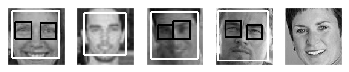

In [45]:
def plot_example(num_examples):
  
  for i in range(num_examples):
    ax = plt.subplot(1,num_examples,i+1)
    ax.imshow(bounded_images[i*5],cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plot_example(5)
np.sum(eyes_len)/dev_images_raw.shape[0]

##Logistic Regression 
Using L1 penalty and C = 100 for a baseline

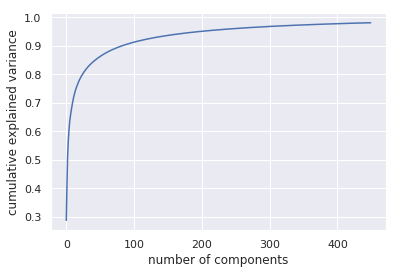

In [0]:

pca = RandomizedPCA(450)
pca.fit(dev_images_raw)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
# Compute the components and projected faces
#pca = RandomizedPCA(150).fit(faces.data)

#projected = pca.inverse_transform(components)

In [0]:
pca = RandomizedPCA(450)
pca.fit(dev_images_raw)
dev_components = pca.transform(dev_images_raw)
train_components = RandomizedPCA(450).fit(train_images).transform(train_images)


In [0]:
print ("logistic regression")
logisticModel=LogisticRegression(solver='saga',multi_class='auto', penalty="l1", C=50)
reg = logisticModel.fit(dev_components, dev_encoded)
logistic_pred=reg.predict(train_components)


logistic regression


In [0]:
from sklearn.metrics import classification_report
output2 = classification_report(encoded, logistic_pred, output_dict=True)
print( "Logistic Regression f1-score ",output2.get('macro avg').get('f1-score'))
print(min(encoded), np.argmin(encoded),max(encoded))
#train_images()

ax = plt.subplot(1,1,1)
ax.imshow(train_images[np.argmin(encoded)].reshape(96,96),cmap='gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [0]:
from sklearn.metrics import confusion_matrix
#print(classification_report(encoded, logistic_pred, output_dict=False))
confusion_matrix(encoded, logistic_pred)

In [0]:
import seaborn as sns; sns.set()

train_df.dtypes

In [0]:
feature = 'left_eye_center_x'

y = np.array(train[feature].values)
X = train.Image.values


In [0]:
print("length y: ",len(y)) # labe
print("shape X: ",X.shape) # of images
print('shape X[1]', X[1].shape) # each image (96*96)



In [0]:

# NB = BernoulliNB()
# NB_fit = NB.fit(X, y)
# NB_pred = NB_fit.predict(dev_left_eye_x)
# print(classification_report(dev_left_eye_x, NB_pred))